<a href="https://colab.research.google.com/github/Sucheet8970/Missing-object-detector/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision numpy opencv-python matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16824, done.
remote: Total 16824 (delta 0), reused 0 (delta 0), pack-reused 16824
Receiving objects: 100% (16824/16824), 15.53 MiB | 24.80 MiB/s, done.
Resolving deltas: 100% (11543/11543), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.5/825.5 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pi

In [1]:
import torch
import cv2
from google.colab.patches import cv2_imshow
from pathlib import Path

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # You can use 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x' based on your requirements


/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-7-27 Python-3.10.12 torch-2.3.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 207MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [17]:
from google.colab import files
uploaded = files.upload()

# Save uploaded images
img1_path = list(uploaded.keys())[0]  # before image
img2_path = list(uploaded.keys())[1]  # after image

Saving 0fcc0c19-d507-44dd-ba98-93f4e3d2c9a8-Photoroom.jpg to 0fcc0c19-d507-44dd-ba98-93f4e3d2c9a8-Photoroom.jpg
Saving 0fcc0c19-d507-44dd-ba98-93f4e3d2c9a8.jpg to 0fcc0c19-d507-44dd-ba98-93f4e3d2c9a8.jpg


In [18]:
# Function to detect objects
def detect_objects(image_path):
    results = model(image_path)
    return results.pandas().xyxy[0]  # Extracting detected objects in pandas dataframe format

# Detect objects in both images
objects_before = detect_objects(img1_path)
objects_after = detect_objects(img2_path)


In [19]:
def list_objects(objects, title):
    print(f"\nObjects in {title}:")
    for obj in objects['name'].unique():
        print(obj)

def compare_objects(before, after):
    missing_objects = []
    for _, obj in before.iterrows():
        if not ((after['name'] == obj['name']) & (after['xmin'] <= obj['xmin']) & (after['ymin'] <= obj['ymin']) & (after['xmax'] >= obj['xmax']) & (after['ymax'] >= obj['ymax'])).any():
            missing_objects.append(obj)
    return missing_objects

# List objects in both images
list_objects(objects_before, "Before Image")
list_objects(objects_after, "After Image")

# Identify missing objects
missing_items = compare_objects(objects_before, objects_after)



Objects in Before Image:
chair
microwave
oven
dining table

Objects in After Image:
chair
microwave
oven
dining table
clock


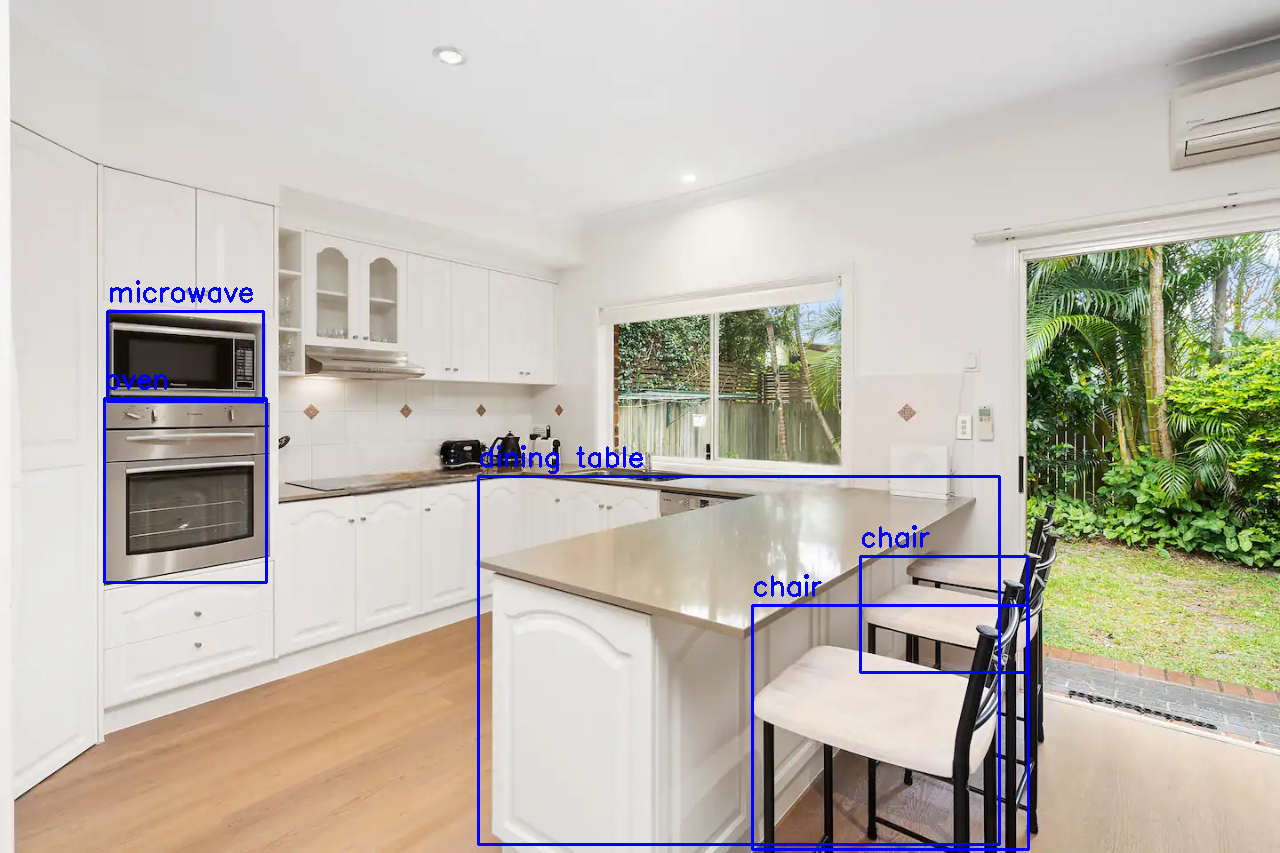

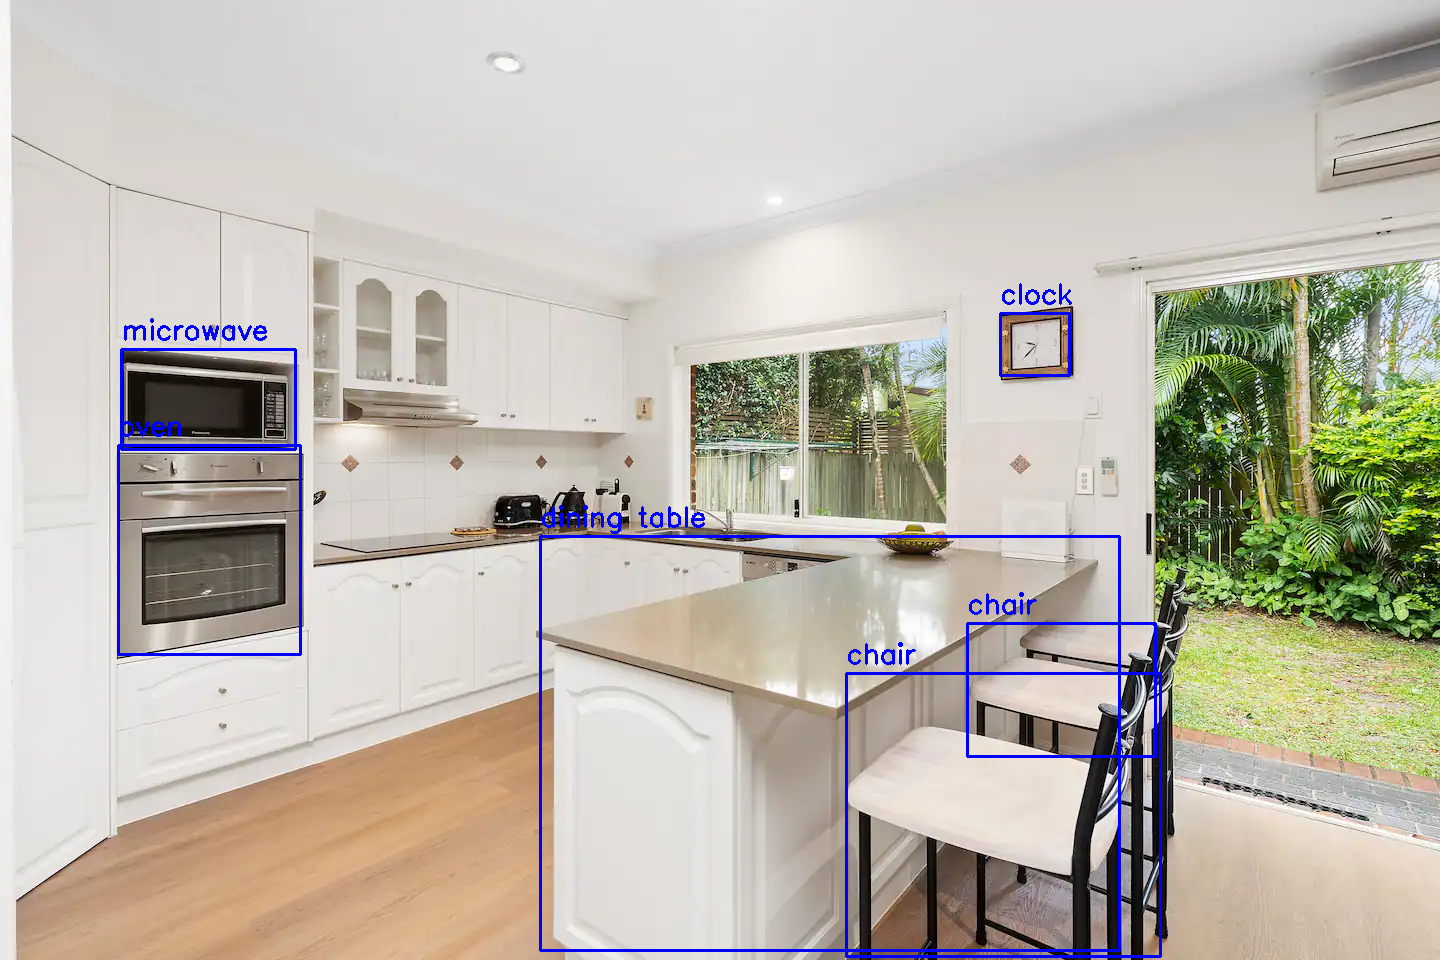


Detected missing items:
chair
microwave
oven
dining table
chair


In [20]:
def plot_image_with_boxes(image_path, objects, title):
    img = cv2.imread(image_path)
    for _, row in objects.iterrows():
        cv2.rectangle(img, (int(row['xmin']), int(row['ymin'])), (int(row['xmax']), int(row['ymax'])), (255, 0, 0), 2)
        cv2.putText(img, row['name'], (int(row['xmin']), int(row['ymin']) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Plot images with detected objects
plot_image_with_boxes(img1_path, objects_before, "Before Image")
plot_image_with_boxes(img2_path, objects_after, "After Image")

# Display missing items
if missing_items:
    print("\nDetected missing items:")
    for item in missing_items:
        print(item['name'])
else:
    print("\nNo items missing.")
